# 第一章 一维非均匀随机数的产生

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

# 设置英文字体为Times New Roman
plt.rcParams["font.family"] = ["serif", "SimSun"]
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams["font.sans-serif"] = ["SimSun"]

# 配置数学文本字体
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams["mathtext.rm"] = "Times New Roman"
plt.rcParams["mathtext.it"] = "Times New Roman:italic"
plt.rcParams["mathtext.bf"] = "Times New Roman:bold"
plt.rcParams['axes.unicode_minus'] = False 

# 设置全局字体大小
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.titlesize': 'large'
})

# 图例
plt.rcParams['legend.loc'] = 'best'

# 刻度和轴
plt.rcParams['axes.autolimit_mode'] = 'data'  # 坐标轴范围自动调整
plt.rcParams['xtick.direction'] = 'in'  # 刻度方向
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["axes.labelpad"] = 10
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['xtick.minor.width'] = 0.75
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['ytick.minor.width'] = 0.75

# 刻度线颜色
plt.rcParams['xtick.color'] = '0.15' # 深灰色
plt.rcParams['ytick.color'] = '0.15'

# 网格和背景
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.color"] = "gray"
plt.rcParams["grid.linestyle"] = ":"
plt.rcParams["axes.facecolor"] = "white"

# 颜色和线条
plt.rcParams["lines.linewidth"] = 2
# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set1(np.linspace(0, 1, 9))) # 默认
mycolors2_5=['#4C87D6','#F38562','#F2B825','#D4C114','#88B421','#199FE0']
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", mycolors2_5)

# 子图
plt.rcParams['figure.subplot.left'] = 0.1
plt.rcParams['figure.subplot.right'] = 0.9
plt.rcParams['figure.subplot.bottom'] = 0.1
plt.rcParams['figure.subplot.top'] = 0.9
plt.rcParams['figure.subplot.wspace'] = 0.4
plt.rcParams['figure.subplot.hspace'] = 0.4

# 图表尺寸和分辨率
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["savefig.dpi"] = 300


## 1.1 常用连续非均匀随机数的产生

**定义 1.0.1**

设随机变量$X$的分布函数为$F(x)$，从分布函数$F(x)$中随机抽样得到的序列{$x_i,i=1,2,\cdots$}称为该分布的随机数序列，$x_i$称为该分布的随机数

### 1.1.1 逆变换抽样法

**定理 1.1.1**

设连续型随机变量$\eta$的分布函数$F(x)$是连续且严格单调上升的分布函数，其反函数存在且记为$F^{-1}(x)$，则有：

（1）随机变量$F(\eta)$服从$(0,1)$上的均匀分布，即$F(\eta)\sim U(0,1)$

（2）对于随机变量$U\sim U(0,1)$，$F^{-1}(U)$的分布函数为$F(x)$

**推论 1.1.1**

已知连续型随机变量$\xi\sim G(x)$，如果$\eta$的分布函数$F(x)$的反函数存在，则随机变量$F^{-1}(G(\xi))\sim F(x)$

**例 1.1.1**

产生概率密度函数为$f(x)$的随机数，其中
$$
f(x)=
\begin{cases}
\frac{x}{\sigma^2} e^{-\frac{x^2}{2\sigma^2}} ,  x>0\\
0, x\leq 0\\
\end{cases}
$$
其分布函数为
$$
F(x)=
\begin{cases}
1- e^{-\frac{x^2}{2\sigma^2}} ,  x>0\\
0, x\leq 0\\
\end{cases}
$$

分布函数的反函数为
$$
F^{-1}(u)=\sqrt{-2\sigma^2\ln (1-u)}
$$

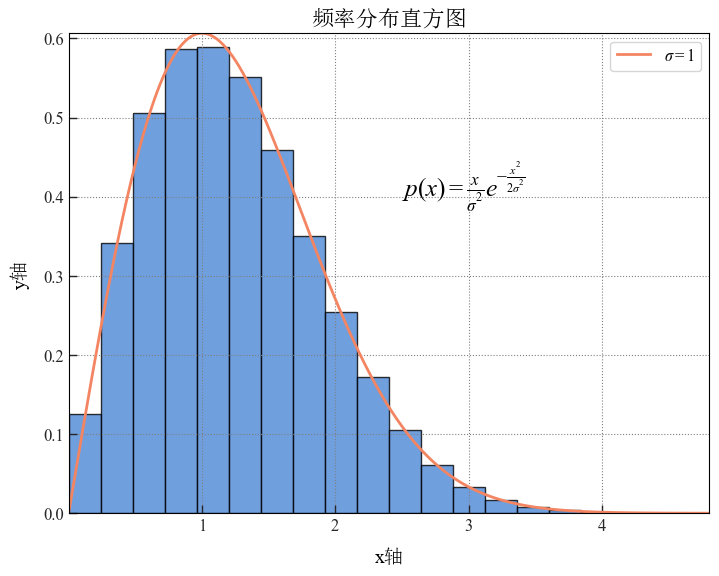

In [41]:
# 设定随机数种子
np.random.seed(1)

# 创建数据
n = 10**5
u = np.random.uniform(0, 1, n)
sigma = 1
func = lambda x: np.sqrt(-2 * sigma**2 * np.log(1 - x))
x = func(u)

# 绘制直方图
plt.hist(x, bins=20, edgecolor="black", density=True, alpha=0.8)
plt.title("频率分布直方图")
plt.xlabel("x轴")
plt.ylabel("y轴")

# 绘制密度函数
pdf = lambda x: x / sigma**2 * np.e ** (-(x**2) / 2 / sigma**2)
x = np.linspace(min(x), max(x), 1000)
y = pdf(x)
plt.plot(x, y, label="$\sigma=$" + f"{sigma}")
plt.text(2.5, 0.4, r"$p(x)=\frac{x}{\sigma^2} e^{-\frac{x^2}{2\sigma^2}}$", fontsize=18)

plt.legend()
plt.autoscale(tight=True)
plt.savefig("fig/figure1.1.1.png")


**例 1.1.2**

产生分布函数为$F(x)$的随机数$\eta$，其中
$$
F(x) = \frac{x^2+x}{2} \ , \ 0 \leq x \leq 1
$$

其反函数为
$$
F^{-1}(u) = \frac{-1+\sqrt{1+8 u}}{2} \ , \ 0 < u < 1
$$

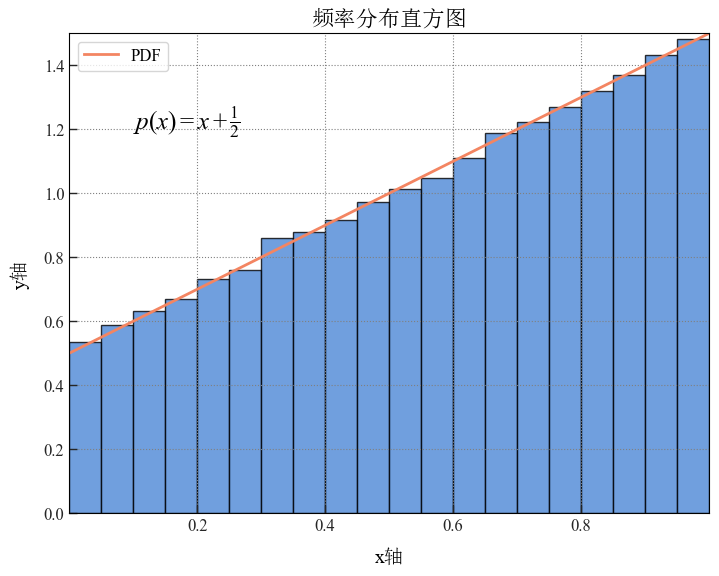

In [42]:
# 设定随机数种子
np.random.seed(1)

# 创建数据
n = 10**5
u = np.random.uniform(0, 1, n)
func = lambda x: (-1 + np.sqrt(1 + 8 * x)) / 2
x = func(u)

# 绘制直方图
plt.hist(x, bins=20, edgecolor="black", density=True, alpha=0.8)
plt.title("频率分布直方图")
plt.xlabel("x轴")
plt.ylabel("y轴")

# 绘制密度函数
pdf = lambda x: x + 1 / 2
x = np.linspace(min(x), max(x), 1000)
y = pdf(x)
plt.plot(x, y, label="PDF")
plt.text(0.1, 1.2, r"$p(x)=x+\frac{1}{2}$", fontsize=18)

plt.legend()
plt.autoscale(tight=True)
plt.savefig("fig/figure1.1.2.png")


### 1.1.2 舍选抽样法

为了介绍舍选抽样法，先给出如下定理

**定理 1.1.2**

设$f(\cdot),g(\cdot)$分别为概率密度函数，$h(\cdot)$为给定函数（不要求是密度函数），如果按照下列步骤生成随机数$\eta$：

（1）独立生成$X\sim f(x)$和$Y\sim g(y)$；

（2）如果$X,Y$满足$Y\leq h(X)$时，令$\eta = X$，并输出$\eta$，否则返回上一步.

令$G(y)$为随机变量$Y$的分布函数，则$\eta$的概率密度函数为
$$
p(z)=\frac{f(z)G(h(z))}{\int_{-\infty}^{+\infty}f(y)G(h(y))\text{d} y}
$$

下面的推论给出了$f,g$的具体形式，对于舍选抽样法更为实用

**推论 1.1.2**

设随机变量$\eta$的概率密度函数$p(z)\leq M(z)$，且$\displaystyle{\int_{-\infty}^{\infty}M(z)\text{d}z=C<\infty}$，令概率密度函数$f(x)=M(x)/C$且$g(y)$是$U(0,1)$的概率密度函数，如果按以下方法生成随机数$\eta$：

（1）独立生成$X\sim f(x)$和$Y \sim U(0,1)$；

（2）直到$X,Y$满足$Y\leq p(X)/M(X)$时，令$\eta = X$，并输出$\eta$.

则$\eta$的概率密度函数为$p(z)$

> 上面的推论需要寻找$p(z)$的一个积分有限的上界函数$M(x)$，有时并不容易找到符号条件的函数，下面这条推论考虑有限区间$(a,b)$上的随机变量，此时仅需找到$p(z)$的一个上界$M$即可（$M(x)=M$为常值函数，积分值为$M(b-a)<\infty$）

**推论 1.1.3**

设随机变量$\eta$在有限区间$(a,b)$上取值，具有概率密度函数$p(z)$且$\sup_{z\in (a,b)}p(z)=M<\infty$，按下列方法生成随机数$\eta$：

（1）独立生成$X\sim U(a,b)$和$Y\sim U(0,1)$；

（2）直到$X,Y$满足$Y\leq p(X)/M$时，令$\eta=X$，并输出$\eta$.

则$\eta$的概率密度函数为$p(z)$

**例 1.1.3**

产生分布为$Beta(\alpha,\beta)$的随机数

$$
p(z)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}z^{\alpha-1}(1-z)^{\beta-1} \ , \ 0<z<1
$$

该分布的众数为$(\alpha-1)/(\alpha+\beta-2)$，即$p(z)$于该处取得最大值
$$
M=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\left(\frac{\alpha-1}{\alpha+\beta-2}\right)^{\alpha-1}\left(1-\frac{\alpha-1}{\alpha+\beta-2}\right)^{\beta-1}

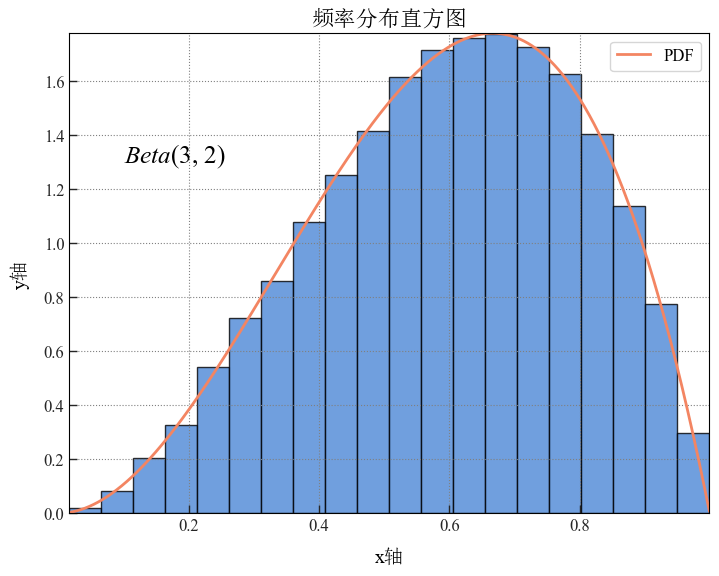

In [43]:
from scipy.special import gamma

# 设定随机数种子
np.random.seed(1)

# 创建数据
n = 10**5
u1 = np.random.uniform(0, 1, n)
u2 = np.random.uniform(0, 1, n)
alpha = 3
beta = 2
pdf = (
    lambda z: gamma(alpha + beta)
    / gamma(alpha)
    / gamma(beta)
    * z ** (alpha - 1)
    * (1 - z) ** (beta - 1)
)
M = pdf((alpha - 1) / (alpha + beta - 2))
func = lambda u1, u2: u1 if u2 <= pdf(u1) / M else None
x = np.array([func(x, y) for x, y in zip(u1, u2)])
x = x[x != None]

# 绘制直方图
plt.hist(x, bins=20, edgecolor="black", density=True, alpha=0.8)
plt.title("频率分布直方图")
plt.xlabel("x轴")
plt.ylabel("y轴")

# 绘制密度函数
x = np.linspace(min(x), max(x), 1000)
y = pdf(x)
plt.plot(x, y, label="PDF")
plt.text(0.1, 1.3, "$Beta$" + f"({alpha}, {beta})", fontsize=18)

plt.legend()
plt.autoscale(tight=True)
plt.savefig("fig/figure1.1.3.png")


> 在比较恰巧的情况下，你也许可以使用下面这种形式的舍选抽样法（本质上原理跟前面一样）

**推论 1.1.4**

设随机变量$\eta$的概率密度函数$p(z)$可表示为
$$
p(z)=Lh(z)f(z)
$$

其中，$L>1,0\leq h(z)\leq 1,f(z)$为概率密度函数，可按以下方法生成随机变量$\eta$：

（1）独立生成$X\sim f(x)$和$Y\sim U(0,1)$；

（2）直到$X,Y$满足$Y\leq h(X)$时，令$\eta=X$，并输出$\eta$.

则$\eta$的概率密度函数为$p(z)$

**例 1.1.4**

试用舍选抽样法产生服从均值为0，方差为1的半正态分布的随机数$\eta$，该分布的概率密度函数为
$$
p(z)=
\begin{cases}
\frac{2}{\sqrt{2\pi}} e^{-\frac{z^2}{2}} \ , \ & z\geq 0\\
0  \ , \  & z <0 \\
\end{cases}
$$

对其进行拆分

$$
p(z)=\sqrt{\frac{2e}{\pi}} \ \cdot \ e^{-\frac{(z-1)^2}{2}} \ \cdot \ e^{-z} 
$$

可取$L=\sqrt{\frac{2e}{\pi}} , h(z)=e^{-\frac{(z-1)^2}{2}},f(z)=\ e^{-z}$

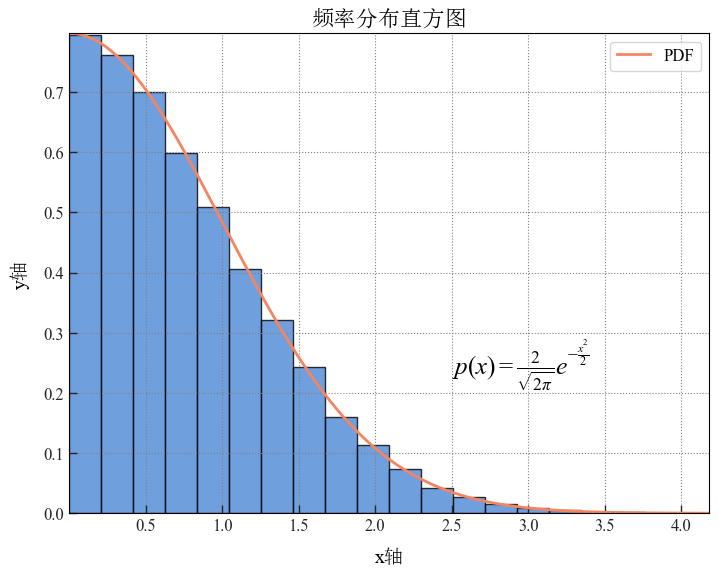

In [44]:
# 设定随机数种子
np.random.seed(1)

# 创建数据
n = 10**5
u1 = np.random.uniform(0, 1, n)
u2 = np.random.uniform(0, 1, n)
L = np.sqrt(2 * np.e / np.pi)
h = lambda z: np.exp(-((z - 1) ** 2) / 2)
f = lambda z: np.exp(-z)
x = -np.log(u1)  # 逆变换抽样法 x~f(x)
func = lambda x, y: x if y <= h(x) else None
x = np.array([func(x, y) for x, y in zip(x, u2)])
x = x[x != None]

# 绘制直方图
plt.hist(x, bins=20, edgecolor="black", density=True, alpha=0.8)
plt.title("频率分布直方图")
plt.xlabel("x轴")
plt.ylabel("y轴")

# 绘制密度函数
pdf = lambda z: L * h(z) * f(z)
x = np.linspace(min(x), max(x), 1000)
y = pdf(x)
plt.plot(x, y, label="PDF")
plt.text(2.5, 0.23, r"$p(x)=\frac{2}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}$", fontsize=18)

plt.legend()
plt.autoscale(tight=True)
plt.savefig("fig/figure1.1.4.png")


**例 1.1.5**

产生分布为$Gamma(\alpha,1)$的随机数，其中$\alpha > 1$

其概率密度函数为
$$
p(z)=\frac{1}{\Gamma(\alpha)}z^{\alpha-1}e^{-z} \ , \ z>0
$$

进行恒等变换
$$
p(x)=\frac{\alpha^\alpha}{\Gamma(\alpha)e^{\alpha-1}}\cdot 
e^{\alpha-1}  (\frac{x}{\alpha})^{\alpha-1} e^{-\frac{\alpha-1}{\alpha}x} \cdot
e^{-\frac{x}{\alpha}}/\alpha
$$

即取
$$
L=\frac{\alpha^\alpha}{\Gamma(\alpha)e^{\alpha-1}} \ , \ 
h(x)=  e^{\alpha-1}  (\frac{x}{\alpha})^{\alpha-1} e^{-\frac{\alpha-1}{\alpha}x} \ , \
f(x) = e^{-\frac{x}{\alpha}}/\alpha
$$

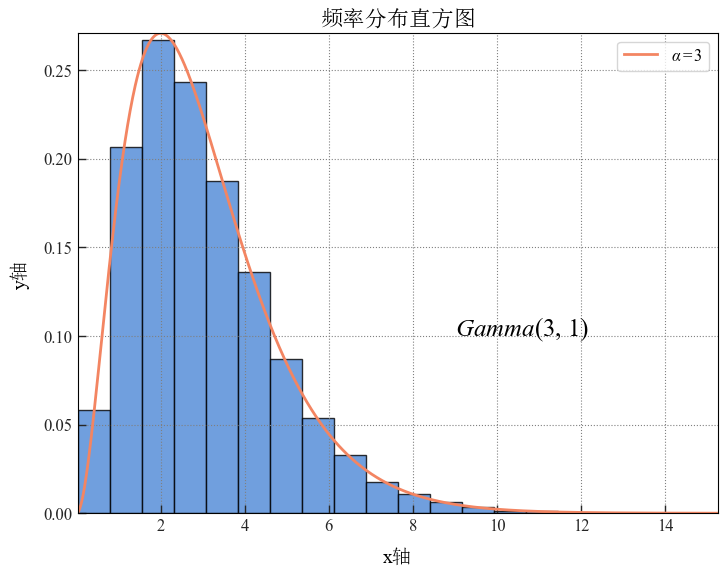

In [49]:
from scipy.special import gamma

# 设定随机数种子
np.random.seed(1)

# 创建数据
alpha = 3
n = 10**5
u1 = np.random.uniform(0, 1 / alpha, n)
u2 = np.random.uniform(0, 1, n)
L = alpha**alpha / gamma(alpha) / np.exp(alpha - 1)
h = (
    lambda z: np.exp(alpha - 1)
    * (z / alpha) ** (alpha - 1)
    * np.exp(-(alpha - 1) * z / alpha)
)
f = lambda z: np.exp(-z / alpha) / alpha
x = -np.log(alpha * u1) * alpha  # 逆变换抽样法 x~f(x)
func = lambda x, y: x if y <= h(x) else None
x = np.array([func(x, y) for x, y in zip(x, u2)])
x = x[x != None]

# 绘制直方图
plt.hist(x, bins=20, edgecolor="black", density=True, alpha=0.8)
plt.title("频率分布直方图")
plt.xlabel("x轴")
plt.ylabel("y轴")

# 绘制密度函数
pdf = lambda z: L * h(z) * f(z)
x = np.linspace(min(x), max(x), 1000)
y = pdf(x)
plt.plot(x, y, label=r"$\alpha=$"+f"{alpha}")
plt.text(9, 0.1, r"$Gamma$"+f"({alpha}, 1)", fontsize=18)

plt.legend()
plt.autoscale(tight=True)
plt.savefig("fig/figure1.1.5.png")


### 1.1.3 变换抽样法

**定理 1.1.3**

设随机变量$\xi$具有概率密度函数$f(x)$，另有一函数$h(z)$严格单调，其反函数记为$h^{-1}(z)$且导函数存在，则$\eta=h(\xi)$是随机变量$\xi$的函数，其概率密度函数为
$$
p(z)=f(h^{-1}(z)) \cdot |(h^{-1}(z))'|
$$

**例 1.1.6**

用变换抽样法产生分布为$N(\mu,\sigma^2)$的随机数

（1）产生标准正态分布随机数 $\xi\sim N(0,1)$

（2）$\eta=h(\xi)=\mu+\sigma\xi$

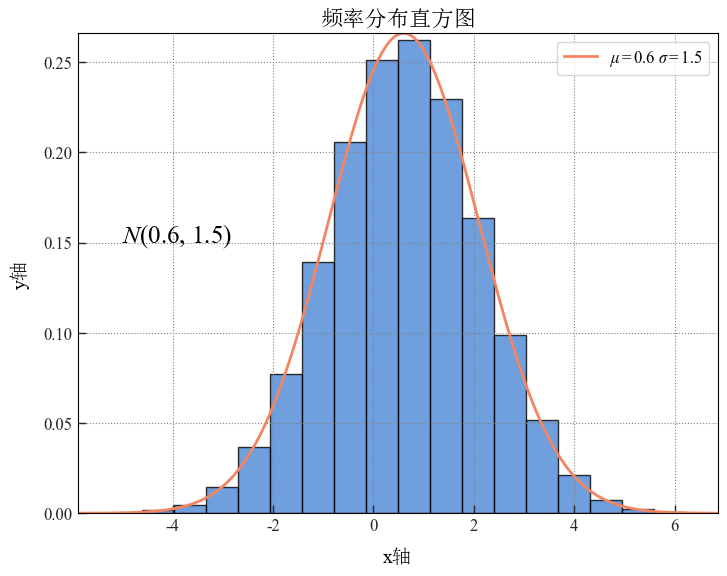

In [67]:
from scipy.stats import norm

# 设定随机数种子
np.random.seed(1)

# 创建数据
n = 10**5
mu = 0.6
sigma = 1.5
z = np.random.randn(n)
func = lambda x : mu + sigma * x
x = func(z)

# 绘制直方图
plt.hist(x, bins=20, edgecolor="black", density=True, alpha=0.8)
plt.title("频率分布直方图")
plt.xlabel("x轴")
plt.ylabel("y轴")

# 绘制密度函数
pdf = lambda x : norm.pdf(x, mu, sigma)
x = np.linspace(min(x), max(x), 1000)
y = pdf(x)
plt.plot(x, y, label=r"$\mu=$"+f"{mu} "+r"$\sigma=$"+f"{sigma}")
plt.text(-5, 0.15, r"$N$"+f"({mu}, {sigma})", fontsize=18)

plt.legend()
plt.autoscale(tight=True)
plt.savefig("fig/figure1.1.6.png")


**例 1.1.7**
用变换抽样法产生分布为 $Gamma(1/2, 3)$的随机数

（1）产生$\zeta\sim N(0,1)$

（2）$\xi=h_2(\zeta)=\zeta^2 \sim \chi^1(1)=Gamma(1/2,1/2)$

（3）$\eta = h_1(\xi)=\xi/6 \sim Gamma(1/2,3)$

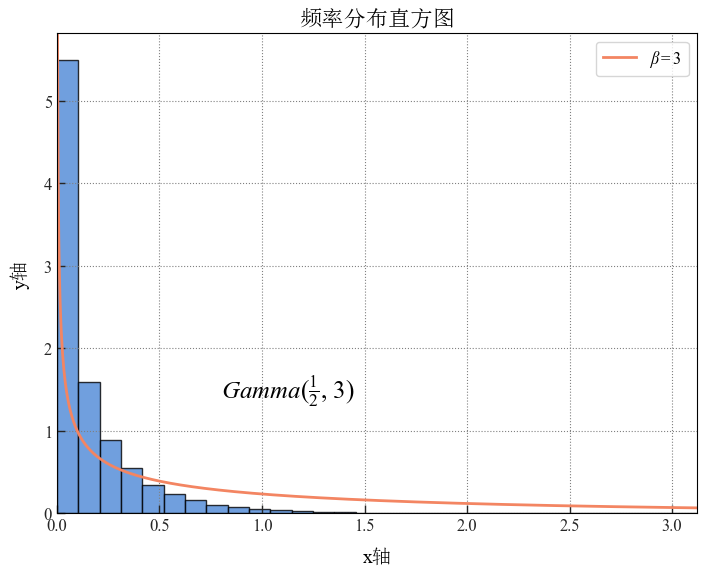

In [38]:
from scipy.stats import gamma

# 设定随机数种子
np.random.seed(1)

# 创建数据
n = 10**5
alpha = 1/2
beta = 3
z = np.random.randn(n)
func = lambda x : x**2 / 2 / beta
x = func(z)


# 绘制直方图
plt.hist(x, bins=30, edgecolor="black", density=True, alpha=0.8)
plt.title("频率分布直方图")
plt.xlabel("x轴")
plt.ylabel("y轴")

# 绘制密度函数
pdf = lambda x : gamma.pdf(x, alpha, scale=beta)
x = np.linspace(0, max(x), 1000)
y = pdf(x)
plt.plot(x, y, label=r"$\beta=$"+f"{beta}")
plt.text(0.8, 1.4, r"$Gamma(\frac{1}{2}$"+f", {beta})", fontsize=18)

plt.legend()
plt.autoscale(tight=True)
plt.savefig("fig/figure1.1.7.png")


**例 1.1.8**

若$n$个随机变量$\xi_1,\xi_2,\cdots,\xi_n$独立同分布与标准正态分布，则$\eta = \sum_{i=1}^n\xi^2_i\sim \chi^2(n)$，其概率密度函数为
$$
f(x)=\frac{1}{2^{n/2}\Gamma(n/2)} x^{n/2-1}e^{-x/2} \ , \ x>0
$$

并用变换抽样法产生$\chi^2(n)$的随机数

（1）产生$n$个$N(0,1)$的随机数$\xi_i$

（2）$\eta=\sum \xi_i^2 \sim Gamma(n/2,1/2)$

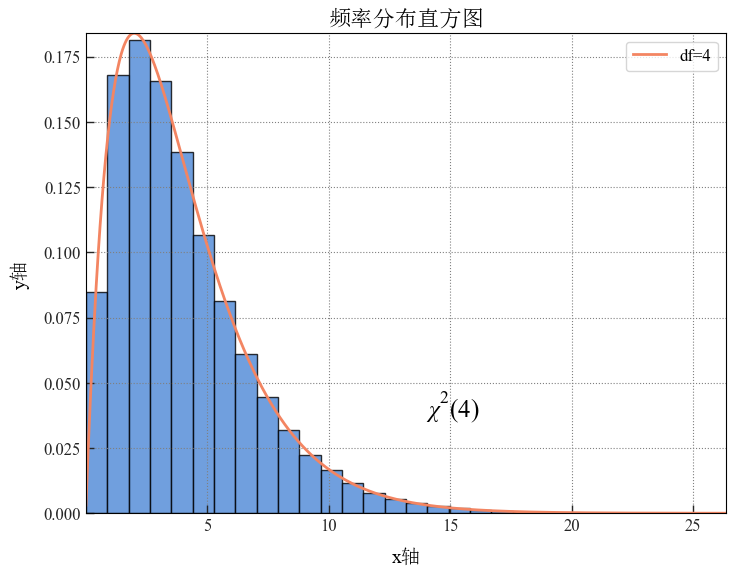

In [39]:
from scipy.stats import chi2

# 设定随机数种子
np.random.seed(1)

# 创建数据
n = 10**5
df = 4
z = np.random.randn(df * n)
func = lambda x: x**2
x = func(z)
x = x.reshape(n, df)
x = x.sum(axis=1)

# 绘制直方图
plt.hist(x, bins=30, edgecolor="black", density=True, alpha=0.8)
plt.title("频率分布直方图")
plt.xlabel("x轴")
plt.ylabel("y轴")

# 绘制密度函数
pdf = lambda x: chi2.pdf(x, df)
x = np.linspace(min(x), max(x), 1000)
y = pdf(x)
plt.plot(x, y, label=f"df={df}")
plt.text(14, 0.037, r"$\chi^2$" + f"({df})", fontsize=18)

plt.legend()
plt.autoscale(tight=True)
plt.savefig("fig/figure1.1.8.png")


**定理 1.1.4**

设随机变量$(\xi_1,\xi_2)$的联合概率密度函数为$f(x_1,x_2)$，令$\eta = g(\xi_1,\xi_2)$且
存在唯一的反变换$h(\cdot,\cdot)$，其一阶偏导数存在，则随机变量$\eta$的概率密度函数为
$$
p(y)=|\frac{\partial h}{\partial y}|\int_{-\infty}^{\infty} f(h(y,z),z)dz
$$

**定理 1.1.5**

设$X_1,X_2,\cdots,X_n$独立同分布，概率密度函数和分布函数为$f(x)$和$F(x)$，有

（1）次序统计量$X_{(k)}$的概率密度函数为
$$
g(y_k)=\frac{n!}{(k-1)!(n-k)!}(F(y_k))^{k-1} (1-F(y_k))^{n-k}f(y_k)
$$

（2）当$y_k\leq y_j$时，次序统计量$X_{(k)}$和$X_{(j)}(1\leq k \leq j \leq n)$的联合密度函数为
$$
g(y_k,y_j)=\frac{n!}{(k-1)!(j-1-k)!(n-j)!}(F(y_k))^{k-1} \times (F(y_j)-F(y_k))^{j-k-1}(1-F(y_j))^{n-j}f(y_k)f(y_j)
$$

（3）当$y_1\leq y_2 \leq \cdots \leq y_r$时，前$r$个次序统计量$X_{(1)},X_{(2)},\cdots,X_{(r)}$的联合密度函数为
$$
g(y_1,y_2,\cdots,y_r)=\frac{n!}{(n-r)!}(1-F(y_r))^{n-r}f(y_1)f(y_2)\cdots f(y_r)
$$

**例 1.1.9**

试用变换抽样法产生$Beta(a,b)$的随机数

其概率密度函数为
$$
f(x)=\frac{(a+b-1)!}{(a-1)!(b-1)!}x^{a-1}(1-x)^{b-1} \ , \ 0 < x <1
$$

$U(0,1)$的次序统计量$X_{(k)}\sim Beta(k,n-k+1)$，因此可以采用变换抽样法产生$Beta(a,b)$的随机数

（1）从$U(0,1)$中独立产生$n=a+b-1$个随机数$X_1,X_2,\cdots,X_n$

（2）将$a+b-1$个随机数排序：$X_{(1)}\leq X_{(2)}\leq \cdots \leq X_{(n)}$

（3）$\eta=X_{(a)}$为所求随机数


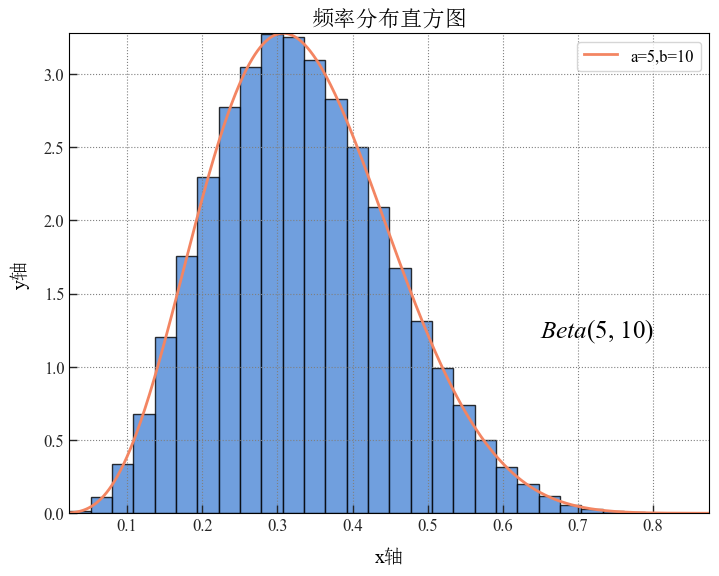

In [40]:
from scipy.stats import beta

# 设定随机数种子
np.random.seed(1)

# 创建数据
n = 10**5
a = 5
b = 10
m = a + b - 1
u = np.random.uniform(0, 1, (m, n))
x = np.sort(u, axis=0)
x = x[a - 1, :]

# 绘制直方图
plt.hist(x, bins=30, edgecolor="black", density=True, alpha=0.8)
plt.title("频率分布直方图")
plt.xlabel("x轴")
plt.ylabel("y轴")

# 绘制密度函数
pdf = lambda x: beta.pdf(x, a, b)
x = np.linspace(min(x), max(x), 1000)
y = pdf(x)
plt.plot(x, y, label=f"a={a},b={b}")
plt.text(0.65, 1.2, r"$Beta$" + f"({a}, {b})", fontsize=18)

plt.legend()
plt.autoscale(tight=True)
plt.savefig("fig/figure1.1.9.png")


### 1.1.4 复合抽样法

**定理 1.1.6**

设随机变量$\eta$的分布函数和概率密度函数分别为$F(x)$和$f(x)$，并且可以写成
$$
F(x) = \sum_{j=1}^k p_jF_j(x) \quad \text{或者} \quad f(x) = \sum_{j=1}^k p_j f_j(x)
$$
其中，$p_j\geq 0,\sum_{j=1}^k p_j=1,F_j(x)$和$f_j(x)$分别是随机变量$\xi_j$的分布函数和概率密度函数，利用复合抽样法产生随机数的步骤概括如下：

（1）产生$U\sim U(0,1)$，如果$U\in \left[ \sum_{j=1}^{l-1}p_j,\sum_{j=1}^l p_j\right)$，令$J=l$；

（2）产生分布函数为$F_J(x)$或概率密度函数为$f_J(x)$的随机数，记为$\eta$

**例 1.1.10**

试产生双指数分布的随机数，其概率密度函数为
$$
f(x)=\frac{1}{2}e^{-|x|}
$$

对其进行改写
$$
f(x)=\frac{1}{2}e^{-x}I(x>0)+\frac{1}{2}e^{x}I(x<0)
$$

（1）$U\sim U(0,1)$

（2）如果$U\leq 1/2$，令$\eta=\xi_1$且$\xi_1$产生自$Exp(1)$；如果$U>1/2$，令$\eta = \xi_2$，且$\xi_2=\ln(R)$，其中$R\sim U(0,1)$


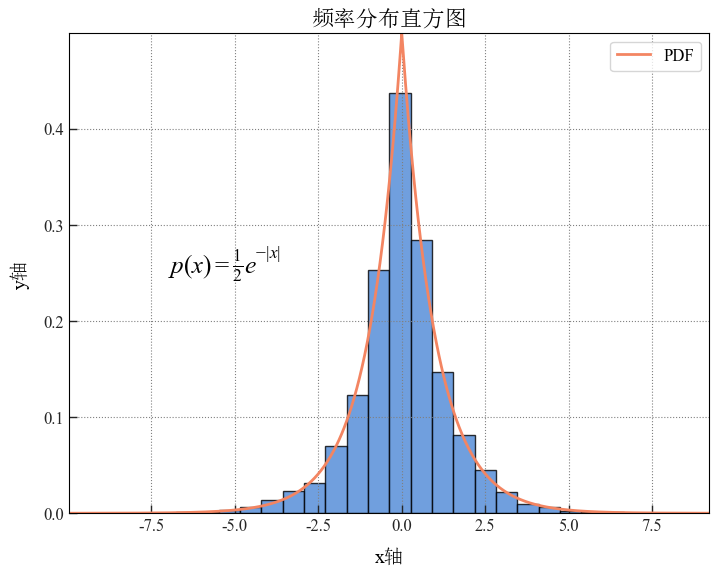

In [35]:
# 设定随机数种子
np.random.seed(1)

# 创建数据
n = 10**4
u = np.random.rand(n)


def func(u):
    for i in range(n):
        if u[i] <= 1 / 2:
            u[i] = np.random.exponential(1)
        else:
            u[i] = np.log(np.random.rand())
    return u


x = func(u)

# 绘制直方图
plt.hist(x, bins=30, edgecolor="black", density=True, alpha=0.8)
plt.title("频率分布直方图")
plt.xlabel("x轴")
plt.ylabel("y轴")

# 绘制密度函数
pdf = lambda x: 1 / 2 * np.exp(-np.abs(x))
x = np.linspace(min(x), max(x), 1000)
y = pdf(x)
plt.plot(x, y, label="PDF")
plt.text(-7, 0.25, r"$p(x)=\frac{1}{2}e^{-|x|}$", fontsize=18)

plt.legend()
plt.autoscale(tight=True)
plt.savefig("fig/figure1.1.10.png")


**例 1.1.11**

试产生混合正态分布的随机数$\eta$，其概率密度函数为$f(x)=p_1f_1(x)+p_2f_2(x)+p_3f_3(x)$，其中，$f_i$分别为$N(\mu_i,\sigma^2_i)$的概率密度函数

用复合抽样法的步骤如下：

（1）产生$U\sim U(0,1)$，如果$U\in \left[ \sum_{j=1}^{l-1}p_j,\sum_{j=1}^l \right)$，令$J=l$

（2）产生$N(\mu_J,\sigma^2_J)$的随机数，记为$\eta$

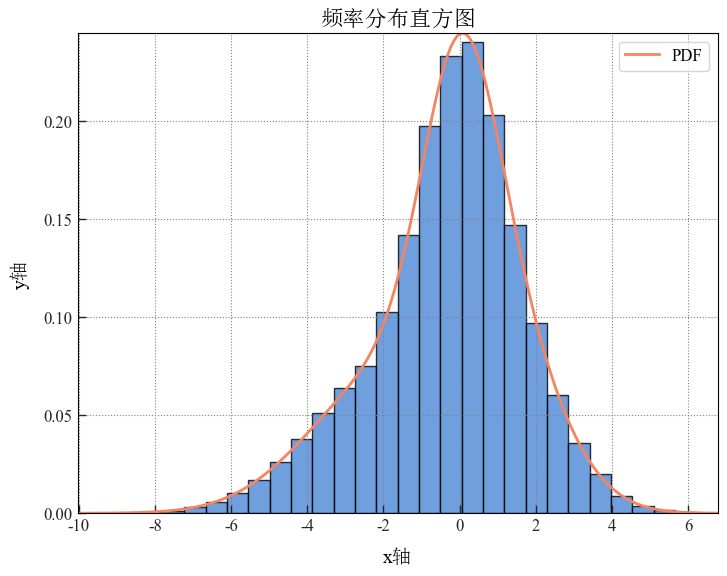

In [51]:
from scipy.stats import norm

# 设定随机数种子
np.random.seed(1)

# 创建数据
n = 10**5
mu = [0, 1, -2]
sigma = [1, 1.5, 2]
u = np.random.rand(n)


def func(u):
    for i in range(n):
        if u[i] <= 1 / 3:
            u[i] = np.random.normal(mu[0], sigma[0])
        elif u[i] > 1 / 3 and u[i] <= 2 / 3:
            u[i] = np.random.normal(mu[1], sigma[1])
        else:
            u[i] = np.random.normal(mu[2], sigma[2])
    return u


x = func(u)

# 绘制直方图
plt.hist(x, bins=30, edgecolor="black", density=True, alpha=0.8)
plt.title("频率分布直方图")
plt.xlabel("x轴")
plt.ylabel("y轴")

# 绘制密度函数
pdf = (
    lambda x: (
        norm.pdf(x, mu[0], sigma[0])
        + norm.pdf(x, mu[1], sigma[1])
        + norm.pdf(x, mu[2], sigma[2])
    )
    / 3
)
x = np.linspace(min(x), max(x), 1000)
y = pdf(x)
plt.plot(x, y, label="PDF")

plt.legend()
plt.autoscale(tight=True)
plt.savefig("fig/figure1.1.11.png")


### 1.1.5 近似抽样法

1. 利用中心极限定理近似抽样

**定理 1.1.7**

设$\{\xi_1,\xi_2,\cdots,\xi_m \}$为独立同分布的随机变量序列，它的数学期望$\mu和方差$\sigma^2$存在，则$\sum_{i=1}^m \xi_i$的标准化形式为
$$
\eta_m = \frac{1}{\sqrt{m}\sigma}\left( \sum_{i=1}^m \xi_i -m\mu \right)
$$
满足中心极限定理，随机变量$\eta_m$的分布函数记为$F_m(x)$，有
$$
\lim_{m\rightarrow\infty} F_m(x)=\Phi(x)
$$
式中，$\Phi(\cdot)$为标准正态分布$N(0,1)$的分布函数，记为$\eta_m \overset{d}{\rightarrow} N(0,1)$，其中的$\overset{d}{\rightarrow} $表示依分布收敛



**例 1.1.12**

试用近似抽样法产生$N(0,1)$随机数

产生$m$个服从$U(0,1)$的随机数$\xi_1,\xi_2,\cdots,\xi_m$，已知$U(0,1)$的期望和方差分别为$1/2$和$1/12$，因此近似抽样法的抽样公式为
$$
\eta = \sqrt{\frac{12}{m}}\sum_{i=1}^m(\xi_m-\frac{1}{2})
$$

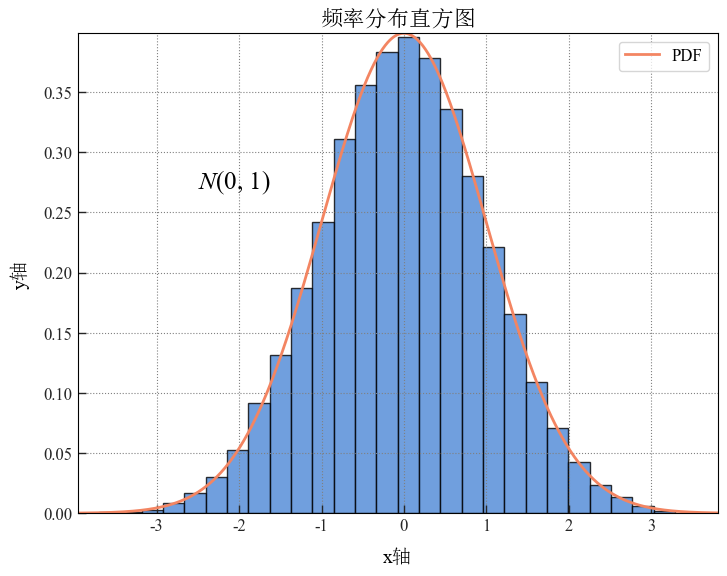

In [3]:
from scipy.stats import norm

# 设定随机数种子
np.random.seed(1)

# 创建数据
n = 10**5
m = 12
u = np.random.rand(m,n)
x = (np.sum(u,axis=0)-m/2)*np.sqrt(12/m)

# 绘制直方图
plt.hist(x, bins=30, edgecolor="black", density=True, alpha=0.8)
plt.title("频率分布直方图")
plt.xlabel("x轴")
plt.ylabel("y轴")

# 绘制密度函数
pdf = lambda x: norm.pdf(x, 0, 1)
x = np.linspace(min(x), max(x), 1000)
y = pdf(x)
plt.plot(x, y, label="PDF")
plt.text(-2.5, 0.27, r"$N$"+"(0, 1)", fontsize=18)

plt.legend()
plt.autoscale(tight=True)
plt.savefig("fig/figure1.1.12.png")


2. 对密度函数近似抽样

**Butler抽样法**

基本思想：

（1）将概率密度函数$f(x)$用多个函数的线性组合表示，即
$$
f(x)=\sum_{j=1}^m p_jf_j(x)
$$

（2）每个$f_j(x)$都用一个简单的函数$\tilde{f}(x)$近似，随后用复合抽样法产生$f(x)$的随机数

这里的近似函数$\tilde{f}$通常取常值函数、简单线性函数、二次函数、样条函数等，这里主要介绍基于线性近似方法的Butler方法

Butler抽样法的具体步骤如下：

（1）产生$R\sim U(0,1)$，令$k=[mR+1]$

（2）产生概率密度函数为$g_k(x)$的随机数，独立产生$U_1,U_2\sim U(0,1)$，当$U_2\leq d_k$时，令
$$
\eta = \begin{cases}
x_{k-1}+(x_k - x_{k-1})\sqrt{U_1} , & f(x_k) > f(x_{k-1})\\
x_k - (x_k-x_{k-1})\sqrt{1-U_1}, & f(x_k) < f(x_{k-1})\\
\end{cases}
$$
当$U_2>d_k$时，令$\eta = x_{k-1} + (x_k - x_{k-1})U_1$

**例 1.1.13**

用近似抽样法产生正态分布的$N(0,1)$的随机数

其密度函数、分布函数别为
$$
f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}  \ , \ 
F(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^x e^{-x^2/2} 
$$
由于$F(-6)\approx 0$和$F(6)\approx 1$，将区间$(a,b)$按照积分值均匀划分为$m$个小区间，使用基于线性函数的Bulter方法产生标准正态分布随机数步骤如下：

（1）产生$R\sim U(0,1)$，令$ k = [mR+1]$

（2）独立产生$U_1,U_2\sim U(0,1)$，令$d_k=|f(x_k)-f(x_{k-1})|/(f(x_k)+f(x_{k-1}))$，当$U_2\leq d_k$时，令
$$
\eta = \begin{cases}
x_{k-1}+(x_k - x_{k-1})\sqrt{U_1} , & f(x_k) > f(x_{k-1})\\
x_k - (x_k-x_{k-1})\sqrt{1-U_1}, & f(x_k) < f(x_{k-1})\\
\end{cases}
$$
当$U_2>d_k$时，令$\eta = x_{k-1} + (x_k - x_{k-1})U_1$


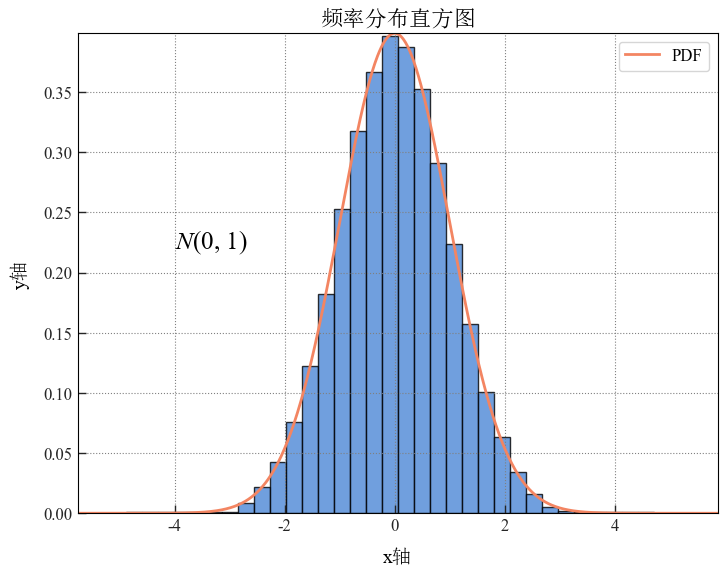

In [9]:
from scipy.stats import norm

# 设定随机数种子
np.random.seed(1)

# 创建数据
n = 10**5
a, b, m = -6, 6, 400
pdf = lambda x: norm.pdf(x, loc=0, scale=1)
x = np.linspace(norm.cdf(a), norm.cdf(b), m + 1)
x = norm.ppf(x)
fx = pdf(x)
d = np.abs(fx[1:] - fx[:-1]) / (fx[1:] + fx[:-1])
eta = []
for i in range(n):
    u, u1, u2 = np.random.rand(), np.random.rand(), np.random.rand()
    k1 = np.floor(m * u).astype(int)
    k2 = k1 + 1
    dk = np.abs(fx[k2] - fx[k1]) / (fx[k2] + fx[k1])
    if u2 <= dk:
        if fx[k2] > fx[k1]:
            eta.append(x[k1] + (x[k2] - x[k1]) * np.sqrt(u1))
        else:
            eta.append(x[k2] - (x[k2] - x[k1]) * np.sqrt(1 - u1))
    else:
        eta.append(x[k1] + (x[k2] - x[k1]) * u1)
x = eta

# 绘制直方图
plt.hist(x, bins=40, edgecolor="black", density=True, alpha=0.8)
plt.title("频率分布直方图")
plt.xlabel("x轴")
plt.ylabel("y轴")

# 绘制密度函数
x = np.linspace(min(x), max(x), 1000)
y = pdf(x)
plt.plot(x, y, label="PDF")
plt.text(-4, 0.22, r"$N$"+"(0, 1)", fontsize=18)

plt.legend()
plt.autoscale(tight=True)
plt.savefig("fig/figure1.1.13.png")


3. 对分布函数近似抽样

> Bulter抽样法是将概率密度函数分解并近似，然后用复合抽样法产生随机数的方法，类似地，也可以对分布函数进行分解

对于给定的$m$个小区间$(x_{j-1},x_{j}](j=1,2,\cdots,m)$以及权系数$p_j=F(x_j)-F(x_{j-1})$，对分布函数$F(x)$近似抽样法步骤如下：

（1）产生$R\sim U(0,1)$，若$R\in \left[ \sum_{j=1}^{l-1} p_j, \sum_{j=1}^lp_j \right)$，令$k=l$

（2）产生$U\sim U(0,1)$，令$\eta = x_{k-1}+(x_k-x_{k-1})U$，则$\eta$为近似服从$F(x)$的随机数

**例 1.1.14**

用分布函数近似抽样法产生正态分布$N(0,1)$的随机数
$$
F(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^x e^{-t^2/2}dt \ , \  -\infty < x <\infty
$$

与例1.1.13类似，取$a=-6,b=6$，区间分为$m$个小区间，步骤如下：

（1）产生$R\sim U(0,1)$，令$p_j=F(x_j)-F(x_{j-1})$，若$R\in \left[ \sum_{j=1}^{l-1} p_j, \sum_{j=1}^lp_j \right)$，令$k=l$

（2）产生$U\sim U(0,1)$，令$\eta = x_{k-1}+(x_k-x_{k-1})U$，由此得到的$\eta$为近似服从标准正态分布$N(0,1)$的随机数

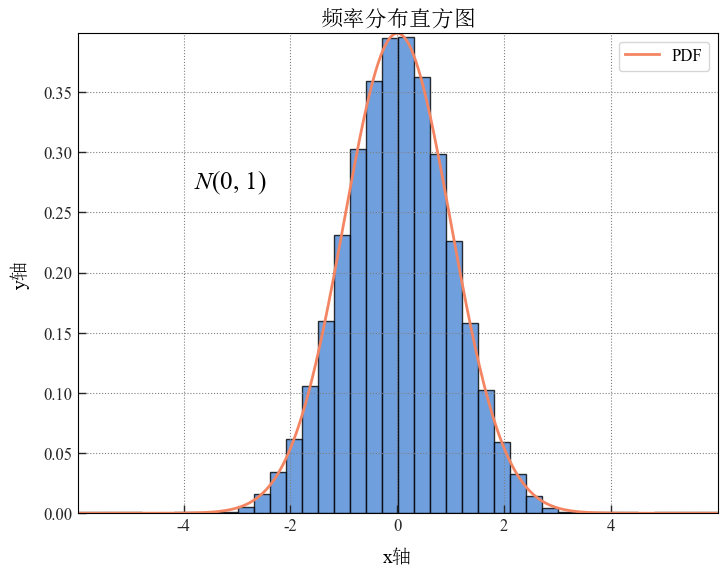

In [19]:
from scipy.stats import norm

# 设定随机数种子
np.random.seed(1)

# 创建数据
n = 10**5
a, b, m = -6, 6, 400
cdf = lambda x: norm.cdf(x, loc=0, scale=1)
t = np.linspace(norm.cdf(a), norm.cdf(b), m + 1)
x = norm.ppf(t)
d = np.abs(fx[1:] - fx[:-1]) / (fx[1:] + fx[:-1])
eta = []
for i in range(n):
    r, u = np.random.rand(), np.random.rand()
    k1 = np.searchsorted(t, r) - 1
    k2 = k1 + 1
    eta.append(x[k1] + (x[k2] - x[k1]) * u)
x = eta

# 绘制直方图
plt.hist(x, bins=40, edgecolor="black", density=True, alpha=0.8)
plt.title("频率分布直方图")
plt.xlabel("x轴")
plt.ylabel("y轴")

# 绘制密度函数
x = np.linspace(min(x), max(x), 1000)
y = pdf(x)
plt.plot(x, y, label="PDF")
plt.text(-3.8, 0.27, r"$N$" + "(0, 1)", fontsize=18)

plt.legend()
plt.autoscale(tight=True)
plt.savefig("fig/figure1.1.14.png")


> 以上介绍的近似抽样法只能用于分布已知（概率密度函数或分布函数已知）的情形，但在实际应用中，通常需要基于观测数据推断未知的总体情况。根据格里汶科定理，观察数据求得的经验分布函数$F_n(x)$是总体分布函数$F(x)$很好的近似，因此可通过经验分布函数产生服从总体分布函数$F(x)$的随机数，进而有了以下的经验分布抽样法

4. 经验分布抽样法

经验分布抽样法可分为以下两种情形：

（1）已知原始观测数据

设$x_1,x_2,\cdots,x_n$是某总体的观测数据，其分布函数$F(x)$未知，将$x_1,x_2,\cdots,x_n$进行排序得到$x_{(1)}\leq x_{(2)}\leq \cdots\leq x_{(n)} $，经验分布函数的定义为
$$
F_n(x)=\begin{cases}
0, &x\in(-\infty,x_{(1)}]\\
k/n, &x\in(x_{(k)},x_{(k+1)}]\\
1,&x\in(x_{(n)},\infty)\\
\end{cases}
$$

> 简单来说，$n$个点将$[x_{(1)},x_{(n)} ] $分成$n-1$个小区间，每个小区间概率均等，最终构成一个阶梯函数

可按如下步骤产生随机数：
1. 产生$U_1\sim U(0,1)$，记$p=(n-1)U_1+1$，令$k=[p]$
2. 产生$U_2\sim U(0,1)$，令$\eta=x_{(k)}+U_2(x_{(k+1)}-x_{(k)}) $

则$\eta$近似服从分布函数$F(x)$的随机数

（2）已知分组观测频数

设已知$n$个观测数据在$m$个连续的小区间$[a_0,a_1),[a_1,a_2),\cdots,[a_{m-1},a_m] $上的观测频数分别为$n_1,n_2,\cdots,n_m(n_1+n_2+\cdots+n_m=n)$，利用这些观测频数可以给出经验分布函数$F_n(x)$
$$
F_n(x)=\begin{cases}
0, &x\in(-\infty,a_{0}]\\
\sum_{i=1}^k \frac{n_i}{n}, &x\in(a_{k},a_{k+1}]\\
1,&x\in(a_{m},\infty)\\
\end{cases}
$$

> 简而言之，用频率代替（1）中概率

按照如下步骤生成随机数：
1. 产生$U\sim U(0,1)$，若$F_n(a_{j-1}) < U \leq F_n(a_j)$，则取$k=j$
2. 令$\eta=a_{k-1}+\frac{U-F_n(a_{k-1})}{F_n(a_k)-F_n(a_{k-1})}(a_k-a_{k-1})$ 

则$\eta$为近似服从总体分布$F(x)$的随机数

> 本节介绍了5种连续非均匀随机数的产生方法，实际上这些随机数的产生都是以$U(0,1)$为基础，目前计算机中的这些随机数都是伪随机数（本质上是一个采用函数构造出的周期非常大的数列）
>
> 在R语言中，已经给出了常用的连续型随机变量产生的函数，如均匀分布（runif）、正态分布（rnorm）、对数正态分布（rlnorm）、指数分布（rexp）、Gamma分布（rgamma）、Beta分布（rbeta）、t分布（rt）、$\chi^2$分布（rchisq）、F分布（fr）等

## 1.2 离散分布随机数的抽样法

### 1.2.1 逆变换法

> 与连续的情况类似，本质都是分布函数反函数，看下面的例子就清楚了

**例 1.2.1**

已知离散型随机变量$\xi$的分布列为
|$x_i$| 1 | 2.5 | 3.5 | 5 | 6 |
|:-:|:-:|:-:|:-:|:-:|:-:|
|$p_i$|0.1|0.2|0.3|0.2|0.2|

试用逆变换法产生服从上述分布列的随机数$\xi$

按照下列方法产生随机数$\xi$

（1）产生$R\sim U(0,1)$

（2）令
$$
\xi=\begin{cases}
1, &R\leq 0.1\\
2.5,&0.1<R\leq 0.3\\
3.5 , & 0.3 < R \leq 0.6\\
5 , & 0.6 < R \leq 0.8\\
6 , & 0.8 < R\leq 1\\
\end{cases}
$$

[0.10138 0.20192 0.29728 0.19954 0.19988]


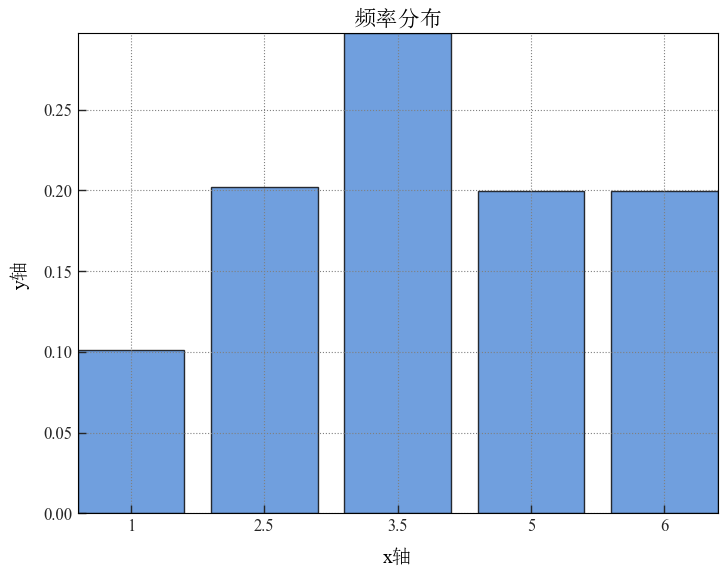

In [54]:
# 设定随机数种子
np.random.seed(1)

# 创建数据
n = 10**5
pdf = np.array([0.1, 0.2, 0.3, 0.2, 0.2])
cdf = np.cumsum(pdf)
value = np.array([1, 2.5, 3.5, 5, 6])
x = []
for i in range(n):
    r = np.random.rand()
    index = np.searchsorted(cdf, r)
    x.append(value[index])
value, count = np.unique(x, return_counts=True)
count = count / n
bars = ["1", "2.5", "3.5", "5", "6"]
print(count)

# 绘制直方图
plt.bar(bars, count, edgecolor="black", alpha=0.8)
plt.title("频率分布")
plt.xlabel("x轴")
plt.ylabel("y轴")

plt.autoscale(tight=True)
plt.savefig("fig/figure1.2.1.png")


## 1.3 习题

**1.1**

Pareto(a,b)分布具有CDF
$$
F(x)=1-(\frac{b}{x})^a \ , \ x\leq b \leq 0 \ , \ a>0
$$
利用逆变换法产生$a=2,b=2$时Pareto分布的随机样本，同时绘制样本密度直方图和分布密度曲线图来比较随机数的产生效果

**解：**

其反函数为
$$
h(u)=b(1-u)^{-1/a}
$$

由逆变换法，可按照以下步骤产生$Pareto(2, 2)$的随机数：

（1）产生$R\sim U(0,1)$的随机数$\xi$

（2）得到$\eta=h(\xi)$，则$\eta \sim Pareto(2,2)$

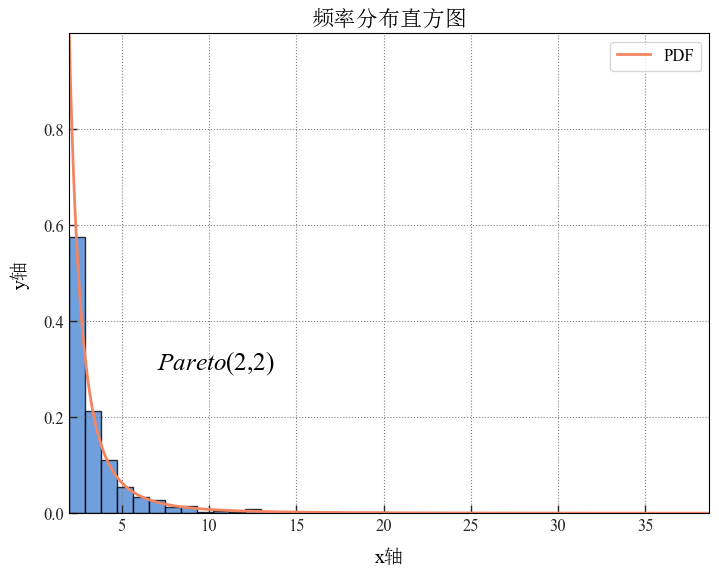

In [47]:
# 设定随机数种子
np.random.seed(1)

# 创建数据
n = 10**3
a ,b= 2,2
u = np.random.uniform(0, 1, n)
func = lambda x: b*(1-u)**(-1/a)
x = func(u)

# 绘制直方图
plt.hist(x, bins=40, edgecolor="black", density=True, alpha=0.8)
plt.title("频率分布直方图")
plt.xlabel("x轴")
plt.ylabel("y轴")

# 绘制密度函数
pdf = lambda x: a*b**a*x**(-a-1)
x = np.linspace(min(x), max(x), 1000)
y = pdf(x)
plt.plot(x, y, label="PDF")
plt.text(7, 0.3, r"$Pareto$"+f'({a},{b})', fontsize=18)

plt.legend()
plt.autoscale(tight=True)
plt.savefig("fig/figure1.3.1.png")


**1.2** 

生成样本量为1000，服从正态混合分布$p_1N(0,1)+(1-p_1)N(3,1)$的随机样本，这里$p_1=0.5$，同时绘制样本密度直方图和分布密度曲线图比较随机数的产生效果

**解：**

使用复合抽样法，其步骤如下：

（1）产生$R\sim U(0,1)$

（2）随机数如下选取
$$
\eta = \begin{cases}
N(0,1) \ , \ R \leq \frac{1}{2}\\
N(3,1) \ , \ R > \frac{1}{2}\\
\end{cases}
$$

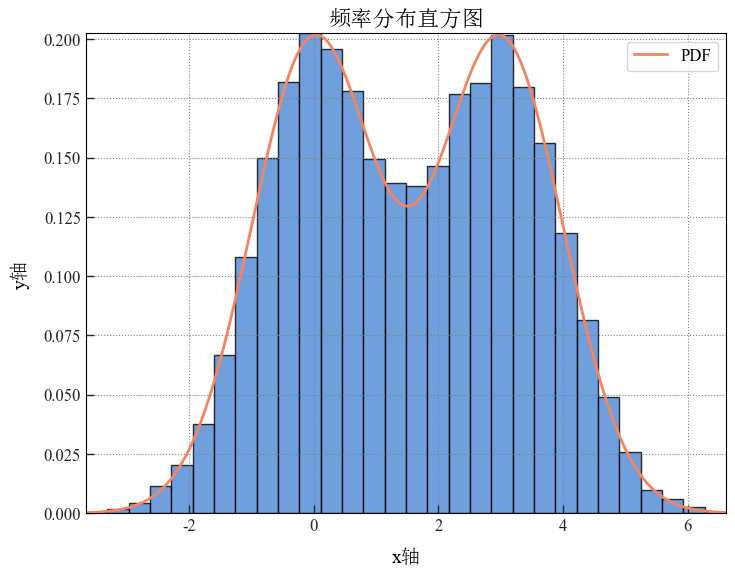

In [53]:
from scipy.stats import norm

# 设定随机数种子
np.random.seed(1)

# 创建数据
n = 10**4
p =1/2
mu = [0, 3]
sigma = [1, 1]
u = np.random.rand(n)


def func(u):
    for i in range(n):
        if u[i] <= p:
            u[i] = np.random.normal(mu[0], sigma[0])
        else:
            u[i] = np.random.normal(mu[1], sigma[1])
    return u


x = func(u)

# 绘制直方图
plt.hist(x, bins=30, edgecolor="black", density=True, alpha=0.8)
plt.title("频率分布直方图")
plt.xlabel("x轴")
plt.ylabel("y轴")

# 绘制密度函数
pdf = lambda x:p*norm.pdf(x, mu[0], sigma[0])+ (1-p)*norm.pdf(x, mu[1], sigma[1])
x = np.linspace(min(x), max(x), 1000)
y = pdf(x)
plt.plot(x, y, label="PDF")

plt.legend()
plt.autoscale(tight=True)
plt.savefig("fig/figure1.3.2.png")


**1.3**

Rayleigh分布具有密度函数
$$
f(x)=\frac{x}{\sigma^2}e^{-\frac{x^2}{2\sigma^2}} \ , \ x\geq 0 \ , \ \sigma > 0
$$

给定$\sigma = 1$，设计多种方法生成上述随机数

**解：**


**方法一：** 逆变换抽样法

其分布函数为
$$
F(x)=
\begin{cases}
1- e^{-\frac{x^2}{2\sigma^2}} ,  x>0\\
0, x\leq 0\\
\end{cases}
$$

分布函数的反函数为
$$
h(u)=\sqrt{-2\sigma^2\ln (1-u)}
$$

由逆变换法，可按照以下步骤产生$Rayleigh(1)$的随机数：

（1）产生$R\sim U(0,1)$的随机数$\xi$

（2）得到$\eta=h(\xi)$，则$\eta \sim Rayleigh(1)$

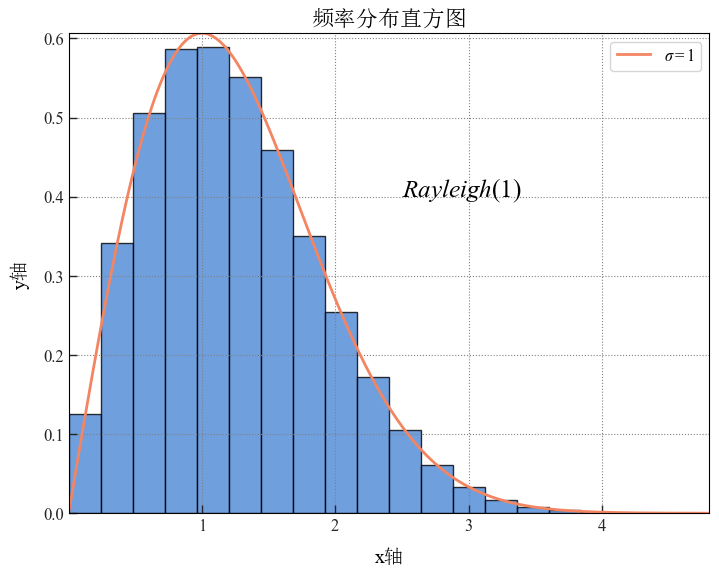

In [56]:
# 设定随机数种子
np.random.seed(1)

# 创建数据
n = 10**5
u = np.random.uniform(0, 1, n)
sigma = 1
func = lambda x: np.sqrt(-2 * sigma**2 * np.log(1 - x))
x = func(u)

# 绘制直方图
plt.hist(x, bins=20, edgecolor="black", density=True, alpha=0.8)
plt.title("频率分布直方图")
plt.xlabel("x轴")
plt.ylabel("y轴")

# 绘制密度函数
pdf = lambda x: x / sigma**2 * np.e ** (-(x**2) / 2 / sigma**2)
x = np.linspace(min(x), max(x), 1000)
y = pdf(x)
plt.plot(x, y, label="$\sigma=$" + f"{sigma}")
plt.text(2.5, 0.4, r"$Rayleigh$"+f"({sigma})", fontsize=18)

plt.legend()
plt.autoscale(tight=True)
plt.savefig("fig/figure1.3.3.1.png")


**方法二：** 舍选法

取$M(x)=e^{1-x}$，则$C=\int_0^\infty M(x)dx=e$

令概率密度函数$f(x)=M(x)/C = e^{-x}$，按以下方法生成随机数$\eta$：

（1）由逆变换抽样法生成$X\sim f(x)$，或者调用函数生成$X\sim Exp(1)$；

（2）独立生成$Y \sim U(0,1)$；

（3）直到$X,Y$满足$Y\leq p(X)/M(X)$时，令$\eta = X$，并输出$\eta$.

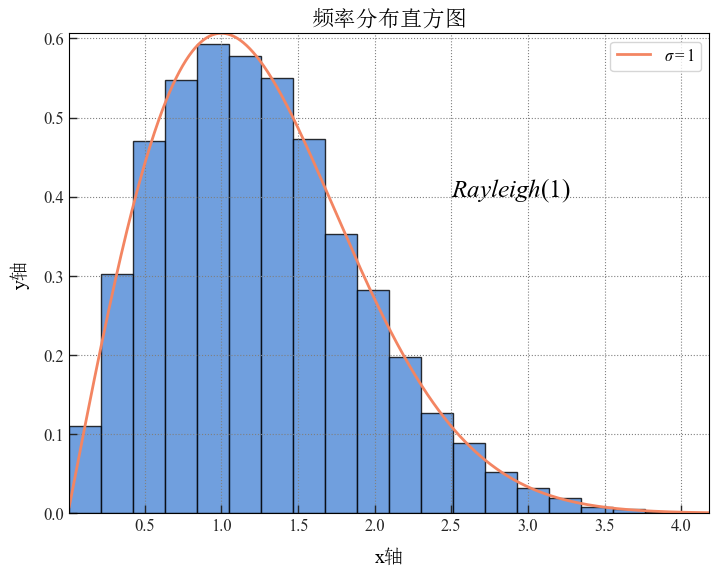

In [63]:
# 设定随机数种子
np.random.seed(1)

# 创建数据
n = 10**5
sigma = 1
u1 = np.random.uniform(0, 1, n)
u1 = -np.log(u1)
u2 = np.random.uniform(0, 1, n)
pdf = lambda x: x / sigma**2 * np.exp(-(x**2) / 2 / sigma**2)
M = lambda x: np.exp(1 - x)
func = lambda u1, u2: u1 if u2 <= pdf(u1) / M(u1) else None
x = np.array([func(x, y) for x, y in zip(u1, u2)])
x = x[x != None]

# 绘制直方图
plt.hist(x, bins=20, edgecolor="black", density=True, alpha=0.8)
plt.title("频率分布直方图")
plt.xlabel("x轴")
plt.ylabel("y轴")

# 绘制密度函数
x = np.linspace(min(x), max(x), 1000)
y = pdf(x)
plt.plot(x, y, label="$\sigma=$" + f"{sigma}")
plt.text(2.5, 0.4, r"$Rayleigh$" + f"({sigma})", fontsize=18)

plt.legend()
plt.autoscale(tight=True)
plt.savefig("fig/figure1.3.3.2.png")


**方法三：** 变换抽样法

有两种变换：

（1）独立生成$X,Y\sim N(0,\sigma^2)$，则$R=\sqrt{X^2+Y^2}\sim Rayleigh(\sigma)$

（2）生成$X\sim Exp(1/2\sigma^2)$，则$R=\sigma \sqrt{X}\sim Rayleigh(\sigma)$（本质上，这里与方法一有点类似，因为指数分布可用逆变换法生成，两函数复合后回到方法一）

这里给出第一种变换的代码

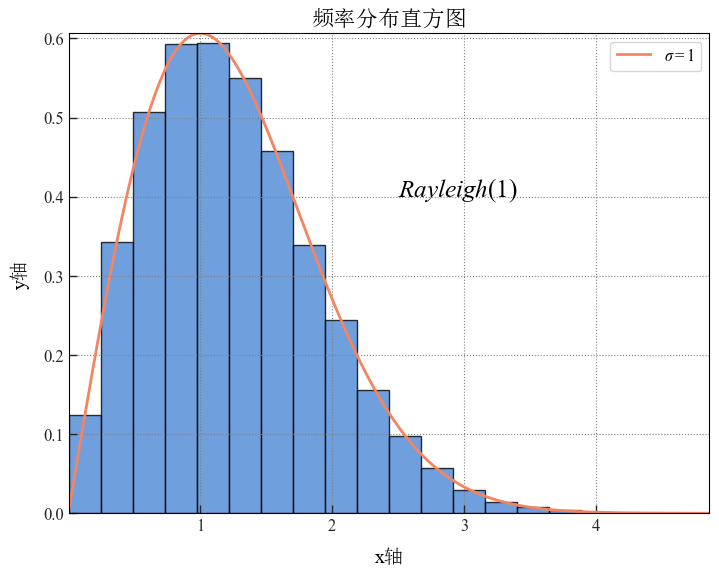

In [64]:
# 设定随机数种子
np.random.seed(1)

# 创建数据
n = 10**5
sigma = 1
z1 = np.random.normal(0, sigma, n)
z2 = np.random.normal(0, sigma, n)
func = lambda x, y: np.sqrt(x**2 + y**2)
x = func(z1, z2)

# 绘制直方图
plt.hist(x, bins=20, edgecolor="black", density=True, alpha=0.8)
plt.title("频率分布直方图")
plt.xlabel("x轴")
plt.ylabel("y轴")

# 绘制密度函数
pdf = lambda x: x / sigma**2 * np.e ** (-(x**2) / 2 / sigma**2)
x = np.linspace(min(x), max(x), 1000)
y = pdf(x)
plt.plot(x, y, label="$\sigma=$" + f"{sigma}")
plt.text(2.5, 0.4, r"$Rayleigh$" + f"({sigma})", fontsize=18)

plt.legend()
plt.autoscale(tight=True)
plt.savefig("fig/figure1.3.3.3.png")


**1.4**

离散型随机变量$X$服从以下分布列
|$X$|0|1|2|3|4|
|:-:|:-:|:-:|:-:|:-:|:-:|
|$p_i$|0.1|0.2|0.2|0.2|0.3|

设计算法生成样本量为1000、服从上述分布的随机数，并且比较随机数的观测频率和理论概率值

**解：** 逆变换法

按照下列方法产生随机数$\xi$

（1）产生$R\sim U(0,1)$

（2）令
$$
\xi=\begin{cases}
0, &R\leq 0.1\\
2,&0.1<R\leq 0.3\\
3 , & 0.3 < R \leq 0.5\\
4 , & 0.5 < R \leq 0.7\\
5 , & 0.7 < R\leq 1\\
\end{cases}
$$

[0.097 0.199 0.198 0.209 0.297]


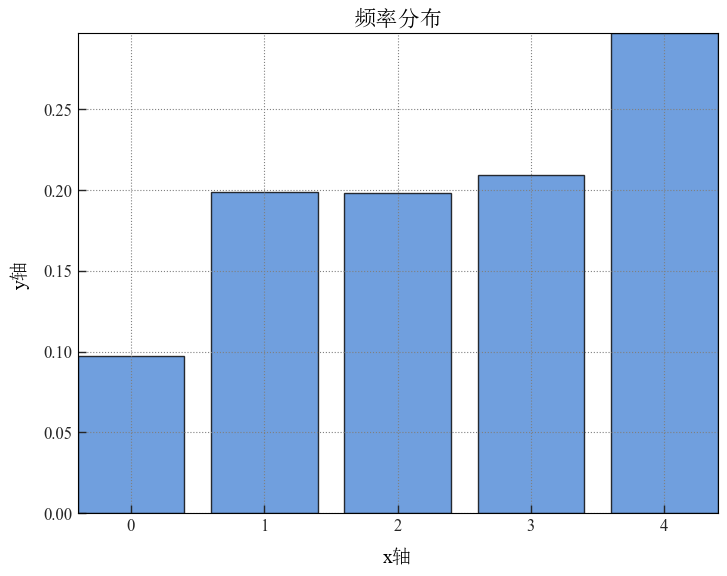

In [66]:
# 设定随机数种子
np.random.seed(1)

# 创建数据
n = 10**3
pdf = np.array([0.1, 0.2, 0.2, 0.2, 0.3])
cdf = np.cumsum(pdf)
value = np.array([0, 1, 2, 3, 4])
x = []
for i in range(n):
    r = np.random.rand()
    index = np.searchsorted(cdf, r)
    x.append(value[index])
value, count = np.unique(x, return_counts=True)
count = count / n
bars = ["0", "1", "2", "3", "4"]
print(count)

# 绘制直方图
plt.bar(bars, count, edgecolor="black", alpha=0.8)
plt.title("频率分布")
plt.xlabel("x轴")
plt.ylabel("y轴")

plt.autoscale(tight=True)
plt.savefig("fig/figure1.3.4.png")
